# SVM - Support Vector Machine


In [3]:
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

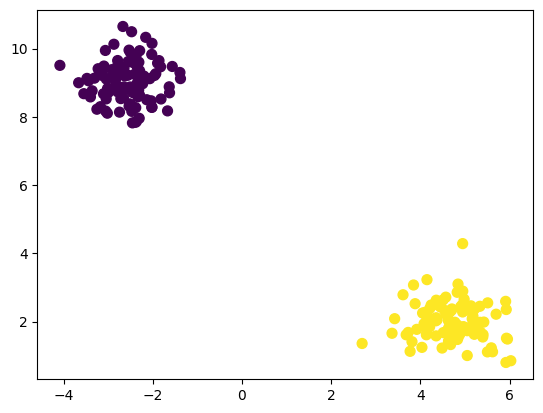

In [7]:
X1, y1 = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=0.6)
y1 = np.where(y1 <= 0, -1, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50)
plt.show()

In [8]:
class SVM_Soft:
    def __init__(self, learning_rate=0.001, lambda_ = 0.001, n_iterations = 100):
        self.lr = learning_rate
        self.lambda_ = lambda_
        self.n_iterations = n_iterations
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeroes(n_features)
        self.b = 0

        for _ in range(self.n_iterations):
            for i, Xi in enumerate(X): #getting the index and value of X
                if y[i] * (np.dot(Xi, self.w) - self.b) >= 1: # if the point is correctly classified then yi(wixi-b)≥1
                    self.w = self.w - self.lr * (2 * self.lambda_ * self.w)
                else: #if the points are misclassified 
                    self.w = self.w - self.lr * (2 * self.lambda_ * self.w - np.dot(Xi, y[i]))
                    self.b = self.b - self.lr * y[i]

        return self.w, self.b


    def predict(self, X):
        y_pred = np.dot(X, self.w) - self.w
        result = [1 if y_pred > 0 else -1]
        return result